In [166]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
churn

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

In [5]:
# dropping mobile number and circle id , as these values are not required for predictions

churn = churn.drop(['mobile_number','circle_id'],axis=1)

In [6]:
# checking the columns after dropping 
churn.shape

(99999, 224)

# Data Cleaning
- imputing missing values
- removing null valued columns
- converting column types
- dropping unecessary columns

In [7]:
# missing value treatment
# look at missing value ratio in each column

churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_

In [8]:
# filling total recharge null values with zero
churn[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  
count       25922.000000  
mean            2.441170  
std             2.516339  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max            84.000000

In [9]:
total_rech_data = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']

churn[total_rech_data] = churn[total_rech_data].apply(lambda x: x.fillna(0))

In [10]:
# filling max recharge null values with zero
churn[['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
count     25153.000000     25571.000000     26339.000000      25922.00000
mean        126.393392       126.729459       125.717301        124.94144
std         108.477235       109.765267       109.437851        111.36376
min           1.000000         1.000000         1.000000          1.00000
25%          25.000000        25.000000        25.000000         25.00000
50%         145.000000       145.000000       145.000000        145.00000
75%         177.000000       177.000000       179.000000        179.00000
max        1555.000000      1555.000000      1555.000000       1555.00000

In [11]:
max_rech_data = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']

churn[max_rech_data] = churn[max_rech_data].apply(lambda x: x.fillna(0))

In [12]:
# filling total count on 2g and 3g recharge null values with zero

churn[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7',
       'count_rech_3g_8','count_rech_3g_9']].describe()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
count     25153.000000     25571.000000     26339.000000     25922.000000   
mean          1.864668         2.044699         2.016288         1.781807   
std           2.570254         2.768332         2.720132         2.214701   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         1.000000         1.000000   
50%           1.000000         1.000000         1.000000         1.000000   
75%           2.000000         2.000000         2.000000         2.000000   
max          42.000000        48.000000        44.000000        40.000000   

       count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  
count     25153.000000     25571.000000     26339.000000     25922.000000  
mean          0.599133         0.621720         0.635711         0.659363  
std           1.274428         1.394524         1.422827         1.411513  
min           0.000000         0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000         0.000000  
50%           0.000000         0.000000         0.000000         0.000000  
75%           1.000000         1.000000         1.000000         1.000000  
max          29.000000        35.000000        45.000000        49.000000

In [13]:
count_rech_data = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                   'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']

churn[count_rech_data] = churn[count_rech_data].apply(lambda x: x.fillna(0))

In [14]:
# filling null values of average recharge amount on data
churn[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].describe()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        25153.000000        25571.000000        26339.000000   
mean           192.600982          200.981292          197.526489   
std            192.646318          196.791224          191.301305   
min              1.000000            0.500000            0.500000   
25%             82.000000           92.000000           87.000000   
50%            154.000000          154.000000          154.000000   
75%            252.000000          252.000000          252.000000   
max           7546.000000         4365.000000         4076.000000   

       av_rech_amt_data_9  
count        25922.000000  
mean           192.734315  
std            188.400286  
min              1.000000  
25%             69.000000  
50%            164.000000  
75%            252.000000  
max           4061.000000

In [15]:
avg_rech_data = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

churn[avg_rech_data] = churn[avg_rech_data].apply(lambda x: x.fillna(0))

In [16]:
# average revenue generated by 2g and 3g user , impute with zero for null values
churn[['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']].describe()

arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6  \
count  25153.000000  25571.000000  26339.000000  25922.000000  25153.000000   
mean      89.555057     89.384120     91.173849    100.264116     86.398003   
std      193.124653    195.893924    188.180936    216.291992    172.767523   
min      -30.820000    -26.040000    -24.490000    -71.090000    -35.830000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.480000      0.420000      0.880000      2.605000     10.830000   
75%      122.070000    119.560000    122.070000    140.010000    122.070000   
max     6362.280000   4980.900000   3716.900000  13884.310000   6433.760000   

          arpu_2g_7     arpu_2g_8     arpu_2g_9  
count  25571.000000  26339.000000  25922.000000  
mean      85.914450     86.599478     93.712026  
std      176.379871    168.247852    171.384224  
min      -15.480000    -55.830000    -45.740000  
25%        0.000000      0.000000      0.000000  
50%        8.810000      9.270000     14.800000  
75%      122.070000    122.070000    140.010000  
max     4809.360000   3483.170000   3467.170000

In [17]:
# impute median value to null using median of arpu_

def get_median(arpu):
    median = churn[arpu].median()
    print(arpu,median)
    churn[arpu] = churn[arpu].fillna((median))
    

In [18]:
arpu_data = ['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

for i in arpu_data:
    get_median(i)
       
#churn[arpu_data] = churn[arpu_data].apply(lambda x: x.fillna(0))

arpu_3g_6 0.48
arpu_3g_7 0.42
arpu_3g_8 0.88
arpu_3g_9 2.605
arpu_2g_6 10.83
arpu_2g_7 8.81
arpu_2g_8 9.27
arpu_2g_9 14.8


In [19]:
# filling NaN to cateforical variables "night_pck" and "fb users" with -1

night_fb_data = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
                'fb_user_8','fb_user_9']

churn[night_fb_data] = churn[night_fb_data].apply(lambda x : x.fillna(-1))

In [20]:
# dropping date columns as it is not muh use

# dropping date_of_last_rech_data in all dataframes , as dont see any usage

churn = churn.drop(['date_of_last_rech_6','date_of_last_rech_data_6','date_of_last_rech_7',
                    'date_of_last_rech_data_7','date_of_last_rech_8',
                    'date_of_last_rech_data_8','date_of_last_rech_9',
                    'date_of_last_rech_data_9'],axis=1)

churn = churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                    'last_date_of_month_9'],axis=1)


# imputing missing values using SKLearn

In [21]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(churn)

In [22]:
churn_cols = churn.columns

# convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(data_with_imputed_values, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [23]:
churn

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
0                 0.0             0.0             0.0  197.385  214.816   
1                 0.0             0.0             0.0   34.047  355.074   
2                 0.0             0.0             0.0  167.690  189.058   
3                 0.0             0.0             0.0  221.338  251.102   
4                 0.0             0.0             0.0  261.636  309.876   
...               ...             ...             ...      ...      ...   
99994             0.0             0.0             0.0   18.471   69.161   
99995             0.0             0.0             0.0  112.201   77.811   
99996             0.0             0.0             0.0  229.187    0.000   
99997             0.0             0.0             0.0  322.991  303.386   
99998             0.0             0.0             0.0  687.065    0.000   

        arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0      213.803   21.100   132.395875   133.670805     0.000000   130.302327   
1      268.321   86.285    24.110000    78.680000     7.680000    18.340000   
2      210.226  290.714    11.540000    55.240000    37.260000    74.810000   
3      508.054  389.500    99.910000    54.390000   310.980000   241.710000   
4      238.174  163.426    50.310000   149.440000    83.890000    58.780000   
...        ...      ...          ...          ...          ...          ...   
99994   57.530   29.950     5.400000     3.360000     5.910000     0.000000   
99995   79.081  140.835    29.260000    18.130000    16.060000    49.490000   
99996    0.000    0.000     1.110000   133.670805   133.018098   130.302327   
99997  606.817  731.010     0.000000     0.000000     0.000000     0.000000   
99998    0.000    0.000    84.340000   133.670805   133.018098   130.302327   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0        197.935577    197.045133      0.000000    190.337222       9.950013   
1         15.740000     99.840000    304.760000     53.760000       0.000000   
2        143.330000    220.590000    208.360000    118.910000       0.000000   
3        123.310000    109.010000     71.680000    113.540000       0.000000   
4         76.960000     91.880000    124.260000     45.810000       0.000000   
...             ...           ...           ...           ...            ...   
99994     15.190000     54.460000     52.790000     27.140000       0.000000   
99995    100.830000     69.010000     66.390000     56.130000       0.000000   
99996     21.040000    197.045133    196.574803    190.337222       0.000000   
99997      0.000000      0.000000      0.000000      0.000000       0.000000   
99998    166.460000    197.045133    196.574803    190.337222       0.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0           7.149898       0.000000       6.343841      13.911337   
1           0.000000       0.000000       0.000000       0.000000   
2           0.000000       0.000000      38.490000       0.000000   
3          54.860000      44.380000       0.000000       0.000000   
4           0.000000       0.000000       0.000000       0.000000   
...              ...            ...            ...            ...   
99994       0.000000       0.000000       0.000000       0.000000   
99995       0.000000       0.000000       0.950000       0.000000   
99996       7.149898       7.292981       6.343841       0.000000   
99997       0.000000       0.000000       0.000000       0.000000   
99998       7.149898       7.292981       6.343841       0.000000   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           9.818732        0.00000       8.555519         47.100763   
1           0.000000        0.00000       0.000000         23.880000   
2           0.000000        0.00000      70.940000          7.190000   
3          28.090000       39.04000       0.000000         73.680000   
4      

### Data cleaning is Completed !!!

## Filtering with 70 Percentile

In [24]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [25]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [26]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [27]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [28]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 217)

## Creating 'churn' dependent variable

In [29]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [30]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [31]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [32]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [33]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [34]:
churn_filtered.filter(regex='9$',axis=1).columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user

In [35]:
# drop all columns in filtered data with _9   
    
churn_9_cols = churn_filtered.filter(regex='9$',axis=1).columns

for i in churn_9_cols:
    churn_filtered = churn_filtered.drop([i],axis=1)

In [36]:
churn_filtered = churn_filtered.drop('sep_vbc_3g',axis=1)

# dropping these columns 'std_og_t2o_mou', 'loc_og_t2o_mou', 'loc_ic_t2o_mou' as it has zero values

churn_filtered = churn_filtered.drop('std_og_t2o_mou',axis=1)

churn_filtered = churn_filtered.drop('loc_og_t2o_mou',axis=1)

churn_filtered = churn_filtered.drop('loc_ic_t2o_mou',axis=1)

In [37]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 163 columns):
 #   Column              Dtype   
---  ------              -----   
 0   arpu_6              float64 
 1   arpu_7              float64 
 2   arpu_8              float64 
 3   onnet_mou_6         float64 
 4   onnet_mou_7         float64 
 5   onnet_mou_8         float64 
 6   offnet_mou_6        float64 
 7   offnet_mou_7        float64 
 8   offnet_mou_8        float64 
 9   roam_ic_mou_6       float64 
 10  roam_ic_mou_7       float64 
 11  roam_ic_mou_8       float64 
 12  roam_og_mou_6       float64 
 13  roam_og_mou_7       float64 
 14  roam_og_mou_8       float64 
 15  loc_og_t2t_mou_6    float64 
 16  loc_og_t2t_mou_7    float64 
 17  loc_og_t2t_mou_8    float64 
 18  loc_og_t2m_mou_6    float64 
 19  loc_og_t2m_mou_7    float64 
 20  loc_og_t2m_mou_8    float64 
 21  loc_og_t2f_mou_6    float64 
 22  loc_og_t2f_mou_7    float64 
 23  loc_og_t2f_mou_8    float64 
 24  l

# Splitting data based on Phases ( Good , Action and Churn ) and analysing

In [38]:
# changing the columns names to 6, 7, 8 encoding

churn_filtered = churn_filtered.rename(columns={'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7',
                                                'jun_vbc_3g':'vbc_3g_6'})

In [39]:
good_phase_1 = churn_filtered.filter(regex='6$', axis=1)
good_phase_2 = churn_filtered.filter(regex='7$', axis=1)

good_phase = pd.concat([good_phase_1, good_phase_2], axis=1) # Good Phase

action_phase = churn_filtered.filter(regex='8$', axis=1) # Action Phase


#churn_phase = churn.filter(regex='9$', axis=1) # Churn Phase

In [40]:
def df_shape(phase,df):
    print("Phase :",phase)
    return(df.shape)
    
print(df_shape('Good Phase',good_phase))
print(df_shape('Action Phase',action_phase))
#print(df_shape('Churn Phase',churn_phase))

print("Total Columns in Good and Action Phase DF's  : ",good_phase.shape[1]+action_phase.shape[1])
print("Total Columns in Churn_Filtered DF's  : ",churn_filtered.shape[1])
print("Total Columns in Churn DF's  : ",churn.shape[1])

Phase : Good Phase
(30001, 109)
Phase : Action Phase
(30001, 52)
Total Columns in Good and Action Phase DF's  :  161
Total Columns in Churn_Filtered DF's  :  163
Total Columns in Churn DF's  :  217


In [41]:
# checking the missing columns

good_cols = good_phase.columns
action_cols = action_phase.columns

list1 = good_cols.append(action_cols)

# prints the missing and additional elements in list2  
print("Additional columns in \"churn_filtered\" dataframe :", (set(churn_filtered).difference(list1))) 
  


Additional columns in "churn_filtered" dataframe : {'churn', 'aon'}


In [42]:
good_phase.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
0   197.385   132.395875    197.935577       9.950013      13.911337   
1  1069.180    57.840000    453.430000      16.230000      23.740000   
2   378.721   413.690000     94.660000       0.000000       0.000000   
3   514.453   102.410000    757.930000       0.000000       0.000000   
4    74.350    48.960000     85.410000       0.000000       0.000000   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0         47.100763         93.342088          3.751013          1.123056   
1         51.390000        308.630000         62.130000          0.000000   
2        297.130000         80.960000          0.000000          0.000000   
3          4.480000         91.810000          0.750000          0.000000   
4         48.960000         82.940000          0.000000          0.000000   

   loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0    144.201175          79.82987         87.299624          1.129011   
1    422.160000           4.30000         49.890000          6.660000   
2    378.090000         116.56000         13.690000          0.000000   
3     97.040000          97.93000        665.360000          0.000000   
4    131.910000           0.00000          2.360000          0.000000   

   std_og_t2c_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  \
0               0.0    168.261218      0.798277      3.916811     0.454157   
1               0.0     60.860000      0.000000      4.500000     0.000000   
2               0.0    130.260000      0.000000      0.000000     0.000000   
3               0.0    763.290000      0.000000      0.000000     0.000000   
4               0.0      2.360000      0.000000      0.100000     0.000000   

   total_og_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0            0.00         47.922365         107.47565         12.084305   
1          487.53         58.140000         217.56000        152.160000   
2          508.36         23.840000          57.58000          0.000000   
3          860.34          2.480000         118.23000          4.610000   
4          134.38         20.710000          95.91000          0.000000   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0    167.491059          9.575993          20.72224          2.156397   
1    427.880000         36.890000          91.44000         52.190000   
2     81.430000          0.000000          22.43000          0.000000   
3    125.330000         14.060000          67.69000          0.000000   
4    116.630000          0.510000           2.43000          0.000000   

   std_ic_t2o_mou_6  std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  \
0               0.0     32.457179            0.00      0.061557      7.460608   
1               0.0    180.540000          626.46      0.210000      2.060000   
2               0.0     22.430000          103.86      0.000000      0.000000   
3               0.0     81.760000          207.09      0.000000      0.000000   
4               0.0      2.940000          119.58      0.000000      0.000000   

   ic_others_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0     0.854656               4.0             362.0           252.0   
1    15.740000               5.0            1580.0          1580.0   
2     0.000000              19.0             437.0            90.0   
3     0.000000              22.0             600.0            50.0   
4     0.000000               3.0               0.0             0.0   

   last_day_rch_amt_6  total_rech_data_6  max_rech_data_6  count_rech_2g_6  \
0               252.0                1.0            252.0              0.0   
1                 0.0                0.0              0.0              0.0   
2                50.0                0.0              0.0              0.0   
3                30.0                0.0              0.0              0.0   
4            

# Performing EDA

In [43]:
churn_filtered.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    263.198136    270.211922   
std      460.640461    479.776947    501.961981    458.618668    478.985086   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     20.010000     18.930000   
50%      481.694000    480.943000    427.585000     92.440000     90.840000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     239.317807    377.289670    381.630159    342.769415      16.291107   
std      456.511907    480.458445    496.930631    478.207088      76.275558   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       15.630000     80.710000     78.540000     63.190000       0.000000   
50%       80.790000    222.540000    220.030000    196.574803       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.770483      12.785940      26.824261      20.327835   
std        75.770480      74.090633     116.162582      96.072386   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       20.255835         85.340389         86.506126         79.872795   
std       104.662818        228.564401        240.308519        226.930657   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.240000          5.530000          4.360000   
50%         0.000000         26.760000         26.910000         25.760000   
75%         0.000000         77.980000         78.340000         72.040000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         164.938955        164.645917        155.347376          6.412256   
std          249.319357        240.775379        232.000363         22.109688   
min            0.000000          0.000000          0.000000          0.000000   
25%           21.840000         23.680000         19.090000          0.000000   
50%           83.190000         84.510000         81.560000          0.230000   
75%          208.930000        208.410000        196.960000          4.230000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean           6.491575          6.030312          1.595506          1.914371   
std           21.930066         19.471855          6.300070          9.155726   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.280000          0.2800

In [44]:
# dropping columns which have zero values
churn_filtered = churn_filtered.drop(['std_og_t2c_mou_6','std_ic_t2o_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_7'],axis=1)

In [45]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 159 columns):
 #   Column              Dtype   
---  ------              -----   
 0   arpu_6              float64 
 1   arpu_7              float64 
 2   arpu_8              float64 
 3   onnet_mou_6         float64 
 4   onnet_mou_7         float64 
 5   onnet_mou_8         float64 
 6   offnet_mou_6        float64 
 7   offnet_mou_7        float64 
 8   offnet_mou_8        float64 
 9   roam_ic_mou_6       float64 
 10  roam_ic_mou_7       float64 
 11  roam_ic_mou_8       float64 
 12  roam_og_mou_6       float64 
 13  roam_og_mou_7       float64 
 14  roam_og_mou_8       float64 
 15  loc_og_t2t_mou_6    float64 
 16  loc_og_t2t_mou_7    float64 
 17  loc_og_t2t_mou_8    float64 
 18  loc_og_t2m_mou_6    float64 
 19  loc_og_t2m_mou_7    float64 
 20  loc_og_t2m_mou_8    float64 
 21  loc_og_t2f_mou_6    float64 
 22  loc_og_t2f_mou_7    float64 
 23  loc_og_t2f_mou_8    float64 
 24  l

# Derived attributes in Good Phase for recharge on data

#good_phase['total_rech_data'] = good_phase['total_rech_data_6']*good_phase['av_rech_amt_data_6']+good_phase['total_rech_data_7']*good_phase['av_rech_amt_data_7']

#good_phase[['total_rech_data','total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7']]

# dropping toatl_reach_data_ and av_rech_amt_data_
good_phase = good_phase.drop(['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7'],axis=1)

# Derived attributes average recahrge amount in Good Phase June month

good_phase['avg_rech_amnt'] = good_phase['total_rech_amt_6']/good_phase['total_rech_num_6']+good_phase['total_rech_amt_7']/good_phase['total_rech_num_7']

#good_phase['avg_rech_amnt'] = good_phase['total_rech_amt_6']/good_phase['total_rech_num_6']

good_phase[['avg_rech_amnt','total_rech_amt_6','total_rech_num_6','total_rech_amt_7','total_rech_num_7']]

#dropping total_rech_amt_ and total_rech_num_

good_phase = good_phase.drop(['total_rech_amt_6','total_rech_num_6','total_rech_amt_7','total_rech_num_7'],axis=1)

In [46]:
# Derived attribute on average revenue arpu_

churn_filtered['avg_arpu'] = (churn_filtered['arpu_6']+churn_filtered['arpu_7']+churn_filtered['arpu_8'])/3

churn_filtered[['avg_arpu','arpu_6','arpu_7','arpu_8']]

avg_arpu    arpu_6    arpu_7    arpu_8
0       208.668000   197.385   214.816   213.803
1      1863.503333  1069.180  1349.850  3171.480
2       336.102000   378.721   492.223   137.362
3       583.322000   514.453   597.753   637.760
4       211.737667    74.350   193.897   366.966
...            ...       ...       ...       ...
29996   344.398333   384.316   255.405   393.474
29997   216.755667   328.594   202.966   118.707
29998   554.845000   644.973   455.228   564.334
29999   409.190000   312.558   512.932   402.080
30000   411.064667   322.991   303.386   606.817

[30001 rows x 4 columns]

In [47]:
# dropping arpu_ 
churn_filtered = churn_filtered.drop(['arpu_6','arpu_7','arpu_8'],axis=1)

In [48]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 157 columns):
 #   Column              Dtype   
---  ------              -----   
 0   onnet_mou_6         float64 
 1   onnet_mou_7         float64 
 2   onnet_mou_8         float64 
 3   offnet_mou_6        float64 
 4   offnet_mou_7        float64 
 5   offnet_mou_8        float64 
 6   roam_ic_mou_6       float64 
 7   roam_ic_mou_7       float64 
 8   roam_ic_mou_8       float64 
 9   roam_og_mou_6       float64 
 10  roam_og_mou_7       float64 
 11  roam_og_mou_8       float64 
 12  loc_og_t2t_mou_6    float64 
 13  loc_og_t2t_mou_7    float64 
 14  loc_og_t2t_mou_8    float64 
 15  loc_og_t2m_mou_6    float64 
 16  loc_og_t2m_mou_7    float64 
 17  loc_og_t2m_mou_8    float64 
 18  loc_og_t2f_mou_6    float64 
 19  loc_og_t2f_mou_7    float64 
 20  loc_og_t2f_mou_8    float64 
 21  loc_og_t2c_mou_6    float64 
 22  loc_og_t2c_mou_7    float64 
 23  loc_og_t2c_mou_8    float64 
 24  l

In [49]:
# Derived attributes 

churn_filtered['avg_onnet_mou'] = (churn_filtered['onnet_mou_6'] + churn_filtered['onnet_mou_7'])/2
churn_filtered['avg_offnet_mou'] = (churn_filtered['offnet_mou_6'] + churn_filtered['offnet_mou_7'])/2
churn_filtered['avg_roam_ic_mou'] = (churn_filtered['roam_ic_mou_6'] + churn_filtered['roam_ic_mou_7'])/2
churn_filtered['avg_roam_og_mou'] = (churn_filtered['roam_og_mou_6'] + churn_filtered['roam_og_mou_7'])/2
churn_filtered['avg_loc_og_t2t_mou'] = (churn_filtered['loc_og_t2t_mou_6'] + churn_filtered['loc_og_t2t_mou_7'])/2
churn_filtered['avg_loc_og_t2m_mou'] = (churn_filtered['loc_og_t2m_mou_6'] + churn_filtered['loc_og_t2m_mou_7'])/2
churn_filtered['avg_loc_og_t2f_mou'] = (churn_filtered['loc_og_t2f_mou_6'] + churn_filtered['loc_og_t2f_mou_7'])/2
churn_filtered['avg_loc_og_t2c_mou'] = (churn_filtered['loc_og_t2c_mou_6'] + churn_filtered['loc_og_t2c_mou_7'])/2
churn_filtered['avg_loc_og_mou'] = (churn_filtered['loc_og_mou_6'] + churn_filtered['loc_og_mou_7'])/2
churn_filtered['avg_std_og_t2t_mou'] = (churn_filtered['std_og_t2t_mou_6'] + churn_filtered['std_og_t2t_mou_7'])/2
churn_filtered['avg_std_og_t2m_mou'] = (churn_filtered['std_og_t2m_mou_6'] + churn_filtered['std_og_t2m_mou_7'])/2
churn_filtered['avg_std_og_t2f_mou'] = (churn_filtered['std_og_t2f_mou_6'] + churn_filtered['std_og_t2f_mou_7'])/2
churn_filtered['avg_std_og_mou'] = (churn_filtered['std_og_mou_6'] + churn_filtered['std_og_mou_7'])/2
churn_filtered['avg_isd_og_mou'] = (churn_filtered['isd_og_mou_6'] + churn_filtered['isd_og_mou_7'])/2
churn_filtered['avg_spl_og_mou'] = (churn_filtered['spl_og_mou_6'] + churn_filtered['spl_og_mou_7'])/2
churn_filtered['avg_og_others'] = (churn_filtered['og_others_6'] + churn_filtered['og_others_7'])/2
churn_filtered['avg_total_og_mou'] = (churn_filtered['total_og_mou_6'] + churn_filtered['total_og_mou_7'])/2
churn_filtered['avg_loc_ic_t2t_mou'] = (churn_filtered['loc_ic_t2t_mou_6'] + churn_filtered['loc_ic_t2t_mou_7'])/2
churn_filtered['avg_loc_ic_t2m_mou'] = (churn_filtered['loc_ic_t2m_mou_6'] + churn_filtered['loc_ic_t2m_mou_7'])/2
churn_filtered['avg_loc_ic_t2f_mou'] = (churn_filtered['loc_ic_t2f_mou_6'] + churn_filtered['loc_ic_t2f_mou_7'])/2
churn_filtered['avg_loc_ic_mou'] = (churn_filtered['loc_ic_mou_6'] + churn_filtered['loc_ic_mou_7'])/2
churn_filtered['avg_std_ic_t2t_mou'] = (churn_filtered['std_ic_t2t_mou_6'] + churn_filtered['std_ic_t2t_mou_7'])/2
churn_filtered['avg_total_ic_mou'] = (churn_filtered['total_ic_mou_6'] + churn_filtered['total_ic_mou_7'])/2
churn_filtered['avg_spl_ic_mou'] = (churn_filtered['spl_ic_mou_6'] + churn_filtered['spl_ic_mou_7'])/2
churn_filtered['avg_isd_ic_mou'] = (churn_filtered['isd_ic_mou_6'] + churn_filtered['isd_ic_mou_7'])/2
churn_filtered['avg_ic_others'] = (churn_filtered['ic_others_6'] + churn_filtered['ic_others_7'])/2
churn_filtered['avg_max_rech_amt'] = (churn_filtered['max_rech_amt_6'] + churn_filtered['max_rech_amt_7'])/2
churn_filtered['avg_last_day_rch_amt'] = (churn_filtered['last_day_rch_amt_6'] + churn_filtered['last_day_rch_amt_7'])/2
churn_filtered['avg_max_rech_data'] = (churn_filtered['max_rech_data_6'] + churn_filtered['max_rech_data_7'])/2
churn_filtered['avg_count_rech_2g'] = (churn_filtered['count_rech_2g_6'] + churn_filtered['count_rech_2g_7'])/2
churn_filtered['avg_count_rech_3g'] = (churn_filtered['count_rech_3g_6'] + churn_filtered['count_rech_3g_7'])/2
churn_filtered['avg_vol_2g_mb'] = (churn_filtered['vol_2g_mb_6'] + churn_filtered['vol_2g_mb_7'])/2
churn_filtered['avg_vol_3g_mb'] = (churn_filtered['vol_3g_mb_6'] + churn_filtered['vol_3g_mb_7'])/2
churn_filtered['avg_arpu_3g'] = (churn_filtered['arpu_3g_6'] + churn_filtered['arpu_3g_7'])/2
churn_filtered['avg_arpu_2g'] = (churn_filtered['arpu_2g_6'] + churn_filtered['arpu_2g_6'])/2
churn_filtered['avg_monthly_2g'] = (churn_filtered['monthly_2g_6'] + churn_filtered['monthly_2g_7'])/2
churn_filtered['avg_sachet_2g'] = (churn_filtered['sachet_2g_6'] + churn_filtered['sachet_2g_7'])/2
churn_filtered['avg_monthly_3g'] = (churn_filtered['monthly_3g_6'] + churn_filtered['monthly_3g_7'])/2
churn_filtered['avg_sachet_3g'] = (churn_filtered['sachet_3g_6'] + churn_filtered['sachet_3g_7'])/2


In [50]:
# dropping columns

churn_filtered = churn_filtered.drop(['onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7',
                             'roam_og_mou_6','roam_og_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6',
                             'loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7',
                             'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
                             'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_mou_6','std_og_mou_7',
                             'isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7','og_others_6','og_others_7','total_og_mou_6',
                             'total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6',
                             'loc_ic_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7','std_ic_t2t_mou_6','std_ic_t2t_mou_7','total_ic_mou_6','total_ic_mou_7',
                             'spl_ic_mou_6','spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','max_rech_amt_6','max_rech_amt_7',
                             'last_day_rch_amt_6','last_day_rch_amt_7','max_rech_data_6','max_rech_data_7','count_rech_2g_6','count_rech_2g_7',
                             'count_rech_3g_6','count_rech_3g_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','arpu_3g_6','arpu_3g_7',
                             'arpu_2g_6','arpu_2g_7','monthly_2g_6','monthly_2g_7','sachet_2g_6','sachet_2g_7','monthly_3g_6','monthly_3g_7','sachet_3g_6',
                             'sachet_3g_7'],axis=1)

In [51]:
# Derived attributes
churn_filtered['avg_std_ic_t2m_mou'] = (churn_filtered['std_ic_t2m_mou_6'] + churn_filtered['std_ic_t2m_mou_7'])/2
churn_filtered['avg_vbc_3g'] = (churn_filtered['vbc_3g_6'] + churn_filtered['vbc_3g_7'])/2
churn_filtered['avg_std_ic_t2f_mou'] = (churn_filtered['std_ic_t2f_mou_6'] + churn_filtered['std_ic_t2f_mou_7'])/2
churn_filtered['avg_std_ic_mou'] = (churn_filtered['std_ic_mou_6'] + churn_filtered['std_ic_mou_7'])/2

In [52]:
# dropping columns

churn_filtered = churn_filtered.drop(['std_ic_t2m_mou_6','std_ic_t2m_mou_7','vbc_3g_6','vbc_3g_7',
'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7'],axis=1)


In [53]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 114 columns):
 #   Column                Dtype   
---  ------                -----   
 0   onnet_mou_8           float64 
 1   offnet_mou_8          float64 
 2   roam_ic_mou_8         float64 
 3   roam_og_mou_8         float64 
 4   loc_og_t2t_mou_8      float64 
 5   loc_og_t2m_mou_8      float64 
 6   loc_og_t2f_mou_8      float64 
 7   loc_og_t2c_mou_8      float64 
 8   loc_og_mou_8          float64 
 9   std_og_t2t_mou_8      float64 
 10  std_og_t2m_mou_8      float64 
 11  std_og_t2f_mou_8      float64 
 12  std_og_t2c_mou_8      float64 
 13  std_og_mou_8          float64 
 14  isd_og_mou_8          float64 
 15  spl_og_mou_8          float64 
 16  og_others_8           float64 
 17  total_og_mou_8        float64 
 18  loc_ic_t2t_mou_8      float64 
 19  loc_ic_t2m_mou_8      float64 
 20  loc_ic_t2f_mou_8      float64 
 21  loc_ic_mou_8          float64 
 22  std_ic_t2t_mou_8     

# Modelling

## Performing PCA and Logistic Regression

In [110]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [111]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

In [112]:
churn_filtered.shape

(30001, 114)

In [113]:
X.shape

(30001, 113)

In [114]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [115]:

# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 113)

(22500,)

(7501, 113)

(7501,)

In [116]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64

fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64

fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64

fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64

In [117]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [133]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [136]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

array([[ 1.65037475e+00, -4.23108489e+00, -1.22782132e+00, ...,
         1.14468205e-16,  5.10757456e-16, -1.25947010e-15],
       [ 7.50973865e+00,  5.10786363e-01, -1.40139018e+00, ...,
        -2.04247225e-15,  2.40017288e-16,  1.30081617e-15],
       [-3.03920906e+00, -1.97476765e+00, -1.03911230e-01, ...,
        -1.35610980e-15,  1.08019778e-15, -6.44814055e-16],
       ...,
       [-3.16506471e+00, -1.99923421e+00,  2.37322562e-01, ...,
         3.43385066e-18, -5.97749877e-17,  1.19376033e-16],
       [-3.62437941e+00,  2.83461755e+00, -1.46518832e+00, ...,
         2.81586243e-17,  1.08860392e-17, -1.04326710e-16],
       [ 2.46818417e-01,  2.28423972e+00, -3.32427141e+00, ...,
         1.07353824e-16,  4.16113846e-17, -1.90683663e-16]])

In [137]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       14.31
1       23.97
2       31.01
3       37.11
4       40.97
5       44.33
6       47.63
7       50.40
8       52.81
9       55.08
10      57.30
11      59.39
12      61.38
13      63.24
14      65.00
15      66.74
16      68.36
17      69.85
18      71.32
19      72.68
20      73.99
21      75.24
22      76.41
23      77.54
24      78.64
25      79.71
26      80.73
27      81.72
28      82.67
29      83.57
30      84.37
31      85.14
32      85.89
33      86.63
34      87.33
35      88.02
36      88.66
37      89.29
38      89.89
39      90.48
40      91.04
41      91.58
42      92.09
43      92.54
44      92.99
45      93.40
46      93.80
47      94.17
48      94.53
49      94.86
50      95.15
51      95.44
52      95.72
53      95.97
54      96.21
55      96.45
56      96.68
57      96.91
58      97.13
59      97.35
60      97.57
61      97.77
62      97.97
63      98.16
64      98.34
65      98.53
66      98.69
67      98.84
68      98.99
69      99.13
70      99.24
71    

In [138]:
pca.components_

array([[-8.33358817e-02, -8.19756189e-02, -4.16684506e-03, ...,
         1.37388948e-01,  7.30861390e-04, -2.05388803e-02],
       [ 9.93753016e-02,  1.51903930e-01,  2.40834261e-02, ...,
         7.68778230e-02,  3.53420663e-02,  7.29568479e-02],
       [ 1.37676792e-01,  1.06531152e-01,  8.65382465e-03, ...,
        -2.94455989e-02, -3.52922941e-02,  8.55121300e-03],
       ...,
       [ 0.00000000e+00,  2.22044605e-16,  9.94696002e-17, ...,
         1.04083409e-17,  5.89250870e-14, -3.29375416e-13],
       [ 0.00000000e+00, -4.50418910e-16,  5.92669351e-17, ...,
        -1.27502175e-16,  6.20753449e-14, -3.26984967e-13],
       [ 0.00000000e+00,  6.42343131e-17,  1.10853114e-17, ...,
        -4.16333634e-17,  4.76632622e-14, -2.30399033e-13]])

<Figure size 630x360 with 0 Axes>

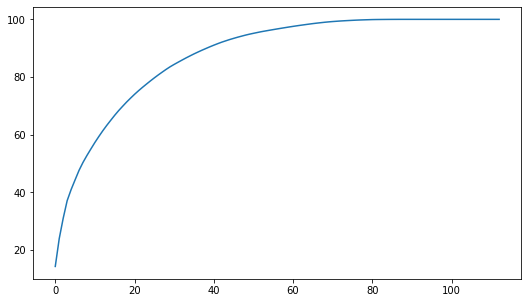

In [139]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [184]:
# create pipeline
PCA_VARS = 80
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [183]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8025333333333333

In [152]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5468 1423]
 [  97  513]]
Sensitivity: 	0.84
Specificity: 	0.79
AUC:    	 0.88


In [153]:
corrmat = np.corrcoef(churn_pca.transpose())

In [154]:
corrmat.shape

(113, 113)

<Figure size 1800x1800 with 0 Axes>

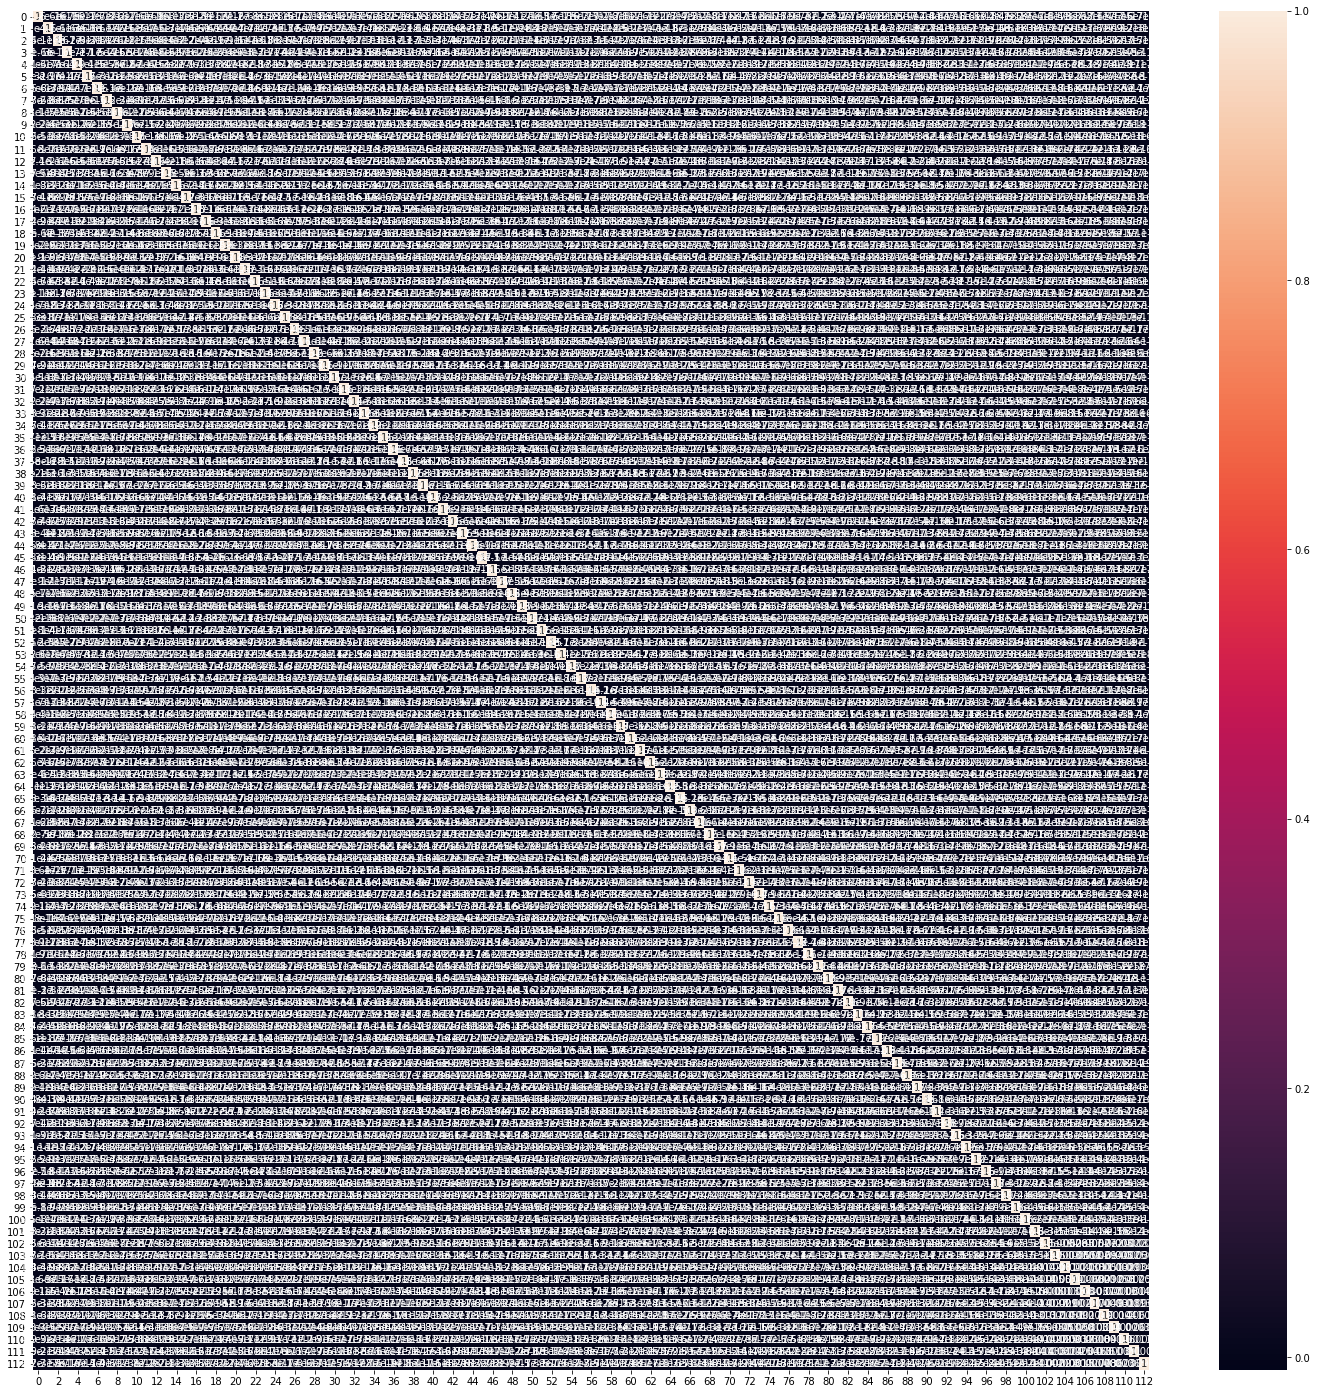

In [155]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

## Random Forest for Feature Selections

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [186]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [187]:
%%time
rf.fit(X_train, y_train)

CPU times: user 223 ms, sys: 55.4 ms, total: 279 ms
Wall time: 297 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [188]:
rf.oob_score_

0.9373777777777778

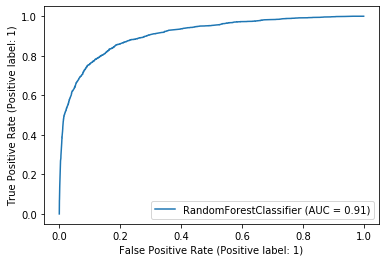

In [193]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

## Hyperparameter Tuning

In [194]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [195]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [196]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [197]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 3.49 s, sys: 373 ms, total: 3.86 s
Wall time: 1min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [198]:
grid_search.best_score_

0.9447555555555556

In [199]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)

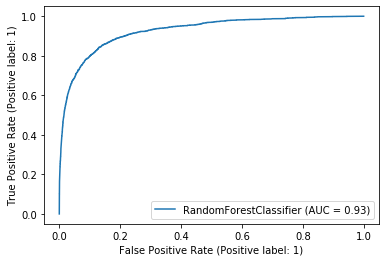

In [200]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [201]:
rf_best.feature_importances_

array([5.80864634e-03, 3.68624102e-03, 9.63641487e-02, 1.13025673e-02,
       6.14334302e-03, 1.87458949e-02, 1.17109821e-04, 5.93023465e-03,
       1.38186675e-02, 1.93237087e-03, 5.28276872e-03, 2.00660084e-02,
       0.00000000e+00, 5.39088032e-03, 2.92919880e-02, 0.00000000e+00,
       0.00000000e+00, 1.23083850e-01, 1.68718450e-02, 2.30634167e-02,
       9.35842323e-03, 4.32471053e-02, 2.91088824e-06, 2.09589716e-04,
       1.98085661e-03, 0.00000000e+00, 1.44015692e-03, 1.88664063e-01,
       5.18158824e-03, 1.24725054e-03, 6.67657834e-03, 8.44111075e-04,
       1.48139771e-03, 1.68734675e-02, 1.12965900e-03, 1.00420251e-03,
       3.07325209e-02, 8.37160896e-02, 3.25563267e-02, 3.25926279e-05,
       4.76002969e-04, 3.29626150e-03, 2.81174723e-02, 4.87124106e-03,
       2.95303331e-03, 8.43293571e-04, 3.28911770e-03, 7.45408864e-03,
       9.76019180e-03, 3.57799120e-03, 4.44211478e-03, 4.65999821e-03,
       1.68413815e-04, 1.36074746e-03, 7.29842124e-03, 0.00000000e+00,
      

In [202]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [203]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
27         total_ic_mou_8  0.188664
17         total_og_mou_8  0.123084
2           roam_ic_mou_8  0.096364
37         max_rech_amt_8  0.083716
21           loc_ic_mou_8  0.043247
61              fb_user_8  0.042705
38     last_day_rch_amt_8  0.032556
36       total_rech_amt_8  0.030733
14           isd_og_mou_8  0.029292
42        max_rech_data_8  0.028117
19       loc_ic_t2m_mou_8  0.023063
11       std_og_t2f_mou_8  0.020066
5        loc_og_t2m_mou_8  0.018746
33       total_rech_num_8  0.016873
18       loc_ic_t2t_mou_8  0.016872
8            loc_og_mou_8  0.013819
3           roam_og_mou_8  0.011303
48            vol_2g_mb_8  0.009760
20       loc_ic_t2f_mou_8  0.009358
92       avg_total_ic_mou  0.008387
47     av_rech_amt_data_8  0.007454
54       night_pck_user_8  0.007298
30            ic_others_8  0.006677
4        loc_og_t2t_mou_8  0.006143
7        loc_og_t2c_mou_8  0.005930
0             onnet_mou_8  0.005809
101         avg_vol_2g_mb  0.005682
13           std_og_mou_8  0.005391
10       std_og_t2m_mou_8  0.005283
28           spl_ic_mou_8  0.005182
43        count_rech_2g_8  0.004871
67             amt_data_7  0.004716
51              arpu_2g_8  0.004660
50              arpu_3g_8  0.004442
1            offnet_mou_8  0.003686
49            vol_3g_mb_8  0.003578
57           monthly_3g_8  0.003381
41      total_rech_data_8  0.003296
46     av_rech_amt_data_7  0.003289
44        count_rech_3g_8  0.002953
63               vbc_3g_8  0.002797
86       avg_total_og_mou  0.002213
66             amt_data_6  0.002090
65      total_data_rech_7  0.002065
24       std_ic_t2f_mou_8  0.001981
80     avg_std_og_t2m_mou  0.001970
9        std_og_t2t_mou_8  0.001932
82         avg_std_og_mou  0.001926
87     avg_loc_ic_t2t_mou  0.001753
98      avg_max_rech_data  0.001745
78         avg_loc_og_mou  0.001664
69               avg_arpu  0.001651
32       total_rech_num_7  0.001481
71         avg_offnet_mou  0.001472
26           std_ic_mou_8  0.001440
79     avg_std_og_t2t_mou  0.001430
53       night_pck_user_7  0.001361
29           isd_ic_mou_8  0.001247
90         avg_loc_ic_mou  0.001215
97   avg_last_day_rch_amt  0.001193
34       total_rech_amt_6  0.001130
73        avg_roam_og_mou  0.001094
72        avg_roam_ic_mou  0.001073
62                    aon  0.001031
35       total_rech_amt_7  0.001004
102         avg_vol_3g_mb  0.000981
104           avg_arpu_2g  0.000901
60              fb_user_7  0.000891
31       total_rech_num_6  0.000844
45     av_rech_amt_data_6  0.000843
88     avg_loc_ic_t2m_mou  0.000836
74     avg_loc_og_t2t_mou  0.000803
85          avg_og_others  0.000690
112        avg_std_ic_mou  0.000675
77     avg_loc_og_t2c_mou  0.000659
40      total_rech_data_7  0.000476
68        av_amt_data_6_7  0.000428
89     avg_loc_ic_t2f_mou  0.000421
76     avg_loc_og_t2f_mou  0.000392
103           avg_arpu_3g  0.000381
70          avg_onnet_mou  0.000361
110            avg_vbc_3g  0.000330
64      total_data_rech_6  0.000263
96       avg_max_rech_amt  0.000254
83         avg_isd_og_mou  0.000250
75     avg_loc_og_t2m_mou  0.000227
23       std_ic_t2m_mou_8  0.000210
99      avg_count_rech_2g  0.000195
91     avg_std_ic_t2t_mou  0.000173
52       night_pck_user_6  0.000168
81     avg_std_og_t2f_mou  0.000155
6        loc_og_t2f_mou_8  0.000117
56            sachet_2g_8  0.000114
111    avg_std_ic_t2f_mou  0.000108
108         avg_sachet_3g  0.000106
109    avg_std_ic_t2m_mou  0.000083
84         avg_spl_og_mou  0.000080
94         avg_isd_ic_mou  0.000060
93         avg_spl_ic_mou  0.000059
39      total_rech_data_6  0.000033
59              fb_user_6  0.000024
22       std_ic_t2t_mou_8  0.000003
55           monthly_2g_8  0.000000
100     avg_count_rech_3g  0.000000
15           spl_og_mou_8  0.000000
12       std_og_t2c_mou_8  0.000000
16            og_others_8  0.000000
58            sachet_3g_8  0.000000
105        avg_monthly_2g  0.000000
106         avg_sachet_2g  0.000000
107        avg_monthly